In [1]:
import numpy as np
#
from qepy.driver import Driver

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
qe_options = {
    '&control': {
        'calculation': "'scf'",
        'pseudo_dir': "'./'",
    },
    '&system': {
        'ibrav' : 0,
        'degauss': 0.005,
        'ecutwfc': 30,
        'nat': 1,
        'ntyp': 1,
        'occupations': "'smearing'",
    },
    'atomic_positions crystal': ['Al    0.0  0.0  0.0'],
    'atomic_species': ['Al  26.98 Al.pbe-nl-kjpaw_psl.1.0.0.UPF'],
    'k_points automatic': ['2 2 2 1 1 1'],
    'cell_parameters angstrom':[
        '0.     2.025  2.025',
        '2.025  0.     2.025',
        '2.025  2.025  0.   '],
}

!wget http://pseudopotentials.quantum-espresso.org/upf_files/Al.pbe-nl-kjpaw_psl.1.0.0.UPF

In [4]:
driver = Driver(qe_options=qe_options, logfile=True, iterative=True)

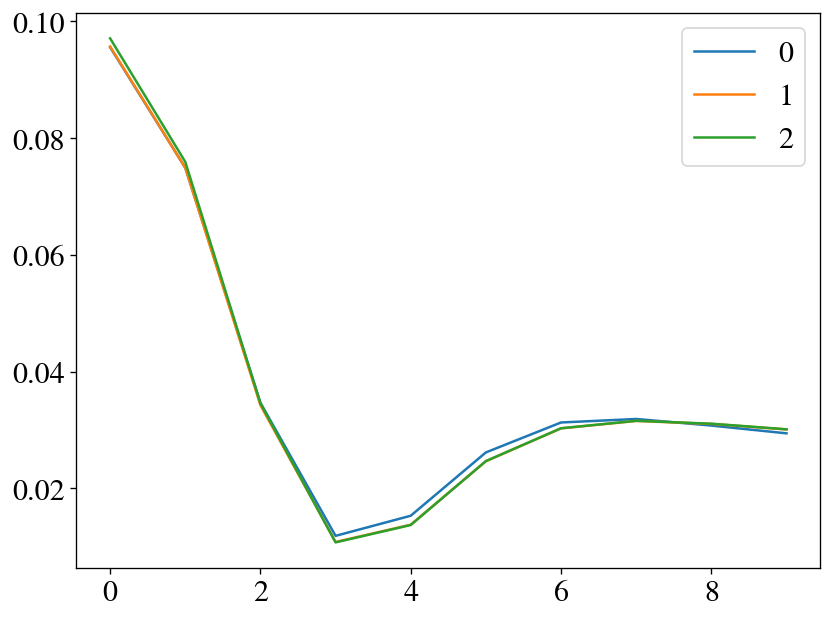

In [5]:
for i in range(40):
    driver.diagonalize()
    driver.mix()
    #
    rho = driver.get_density()
    plt.plot(rho[:10,0], label=str(i))
    #
    converged = driver.check_convergence()
    if converged : break
plt.legend()

In [6]:
driver.stop()